# py.deep-learning

    Python Version:    Python 3.10.9
    Conda Version:     conda 23.1.0
    Conda Environment: jup
    Conda Path:        $HOME/.conda/envs/jup


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

2023-03-27 07:49:30.316039: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mnist = keras.datasets.mnist

(xtrain_full, ytrain_full), (xtest, ytest) = mnist.load_data();

In [3]:
xtest.shape

(10000, 28, 28)

In [4]:
xtrain_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
xtrain_full.shape

(60000, 28, 28)

In [6]:
ytrain_full.shape

(60000,)

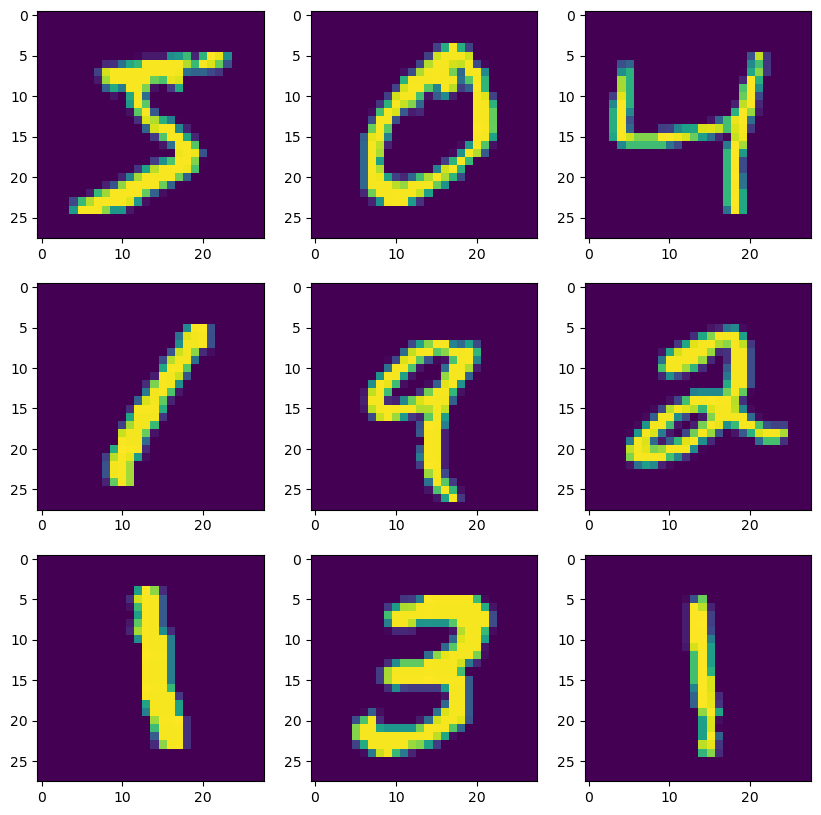

In [7]:
fig, axes = plt.subplots(nrows = 3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):
        axes[i, j].imshow(xtrain_full[a])
        a = a + 1

plt.show()

In [8]:
# Normalization

xvalid, xtrain = xtrain_full[:5000] / 255, xtrain_full[5000:] / 255
yvalid, ytrain = ytrain_full[:5000], ytrain_full[5000:]
xtest = xtest / 255

In [32]:
class_names = np.array2string(np.arange(10))
class_names # not what we want

'[0 1 2 3 4 5 6 7 8 9]'

In [33]:
class_names = np.arange(10).astype(str)
class_names

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U21')

In [11]:
ytest, ytest.shape, ytrain[1]

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8), (10000,), 3)

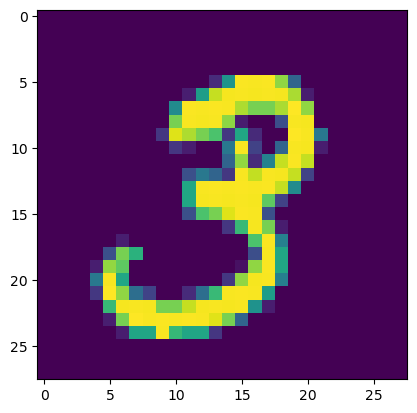

In [12]:
plt.imshow(xtrain[1])

In [13]:
ytrain[1], class_names[ytrain[1]]

(3, '3')

In [15]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))



Sigmoid and Softmax are both activation functions in neural networks, but they have some differences:

Sigmoid:

It takes any input value and squeezes it into a range between 0 and 1.
It is mostly used in binary classification problems as it can produce a probability score for the positive class.
It can cause the vanishing gradient problem and become less effective with very large or very small inputs.
Softmax:

It also converts input values into a range between 0 and 1, but it ensures that the values add up to 1 across all classes.
It is used for multi-class classification problems as it can produce a probability distribution across all classes.
It can handle large inputs well and is more effective for problems with more than two classes.
In summary, both sigmoid and softmax are activation functions that convert input values into a range between 0 and 1, but sigmoid is mostly used for binary classification, while softmax is used for multi-class classification.


The mathematical formulas for Sigmoid and Softmax are as follows:

Sigmoid:

sigmoid(x) = 1 / (1 + e^-x)

Where 'x' is the input value.

Softmax:

softmax(x_i) = e^(x_i) / (e^(x_1) + e^(x_2) + ... + e^(x_n))

Where 'x_i' is the input value of the i-th class, and 'n' is the total number of classes. The softmax function takes the exponent of the input values and normalizes the values by dividing them by the sum of all the exponentiated input values. This results in a probability distribution across all the classes that adds up to 1.

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

## Available losses


Probabilistic losses

    BinaryCrossentropy class
    CategoricalCrossentropy class
    SparseCategoricalCrossentropy class
    Poisson class
    binary_crossentropy function
    categorical_crossentropy function
    sparse_categorical_crossentropy function
    poisson function
    KLDivergence class
    kl_divergence function

Regression losses

    MeanSquaredError class
    MeanAbsoluteError class
    MeanAbsolutePercentageError class
    MeanSquaredLogarithmicError class
    CosineSimilarity class
    mean_squared_error function
    mean_absolute_error function
    mean_absolute_percentage_error function
    mean_squared_logarithmic_error function
    cosine_similarity function
    Huber class
    huber function
    LogCosh class
    log_cosh function

Hinge losses for "maximum-margin" classification

    Hinge class
    SquaredHinge class
    CategoricalHinge class
    hinge function
    squared_hinge function
    categorical_hinge function


https://keras.io/api/losses/

https://keras.io/api/optimizers/#available-optimizers

https://keras.io/api/metrics


## Available optimizers

    SGD
    RMSprop
    Adam
    AdamW
    Adadelta
    Adagrad
    Adamax
    Adafactor
    Nadam
    Ftrl


## Available metrics


Accuracy metrics

    Accuracy class
    BinaryAccuracy class
    CategoricalAccuracy class
    SparseCategoricalAccuracy class
    TopKCategoricalAccuracy class
    SparseTopKCategoricalAccuracy class

Probabilistic metrics

    BinaryCrossentropy class
    CategoricalCrossentropy class
    SparseCategoricalCrossentropy class
    KLDivergence class
    Poisson class

Regression metrics

    MeanSquaredError class
    RootMeanSquaredError class
    MeanAbsoluteError class
    MeanAbsolutePercentageError class
    MeanSquaredLogarithmicError class
    CosineSimilarity class
    LogCoshError class

Classification metrics based on True/False positives & negatives

    AUC class
    Precision class
    Recall class
    TruePositives class
    TrueNegatives class
    FalsePositives class
    FalseNegatives class
    PrecisionAtRecall class
    SensitivityAtSpecificity class
    SpecificityAtSensitivity class

Image segmentation metrics

    MeanIoU class

Hinge metrics for "maximum-margin" classification

    Hinge class
    SquaredHinge class
    CategoricalHinge class


In [21]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd", # stochastic gradient descent
    metrics=["accuracy"])

In [22]:
# batch = the batch size is a hyperparameter that defines the number of samples to work through before updateing the internal model parameters
# epochs = ho many times to do a pass over all the dataset

history = model.fit(
    xtrain, ytrain,
    epochs=30,
    validation_data=(xvalid, yvalid),
    batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 32s 18ms/step - loss: 0.5899 - accuracy: 0.8479 - val_loss: 0.3112 - val_accuracy: 0.9114
Epoch 2/30
1719/1719 [==============================] - 43s 25ms/step - loss: 0.2895 - accuracy: 0.9168 - val_loss: 0.2404 - val_accuracy: 0.9318
Epoch 3/30
1719/1719 [==============================] - 48s 28ms/step - loss: 0.2380 - accuracy: 0.9316 - val_loss: 0.2032 - val_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 49s 28ms/step - loss: 0.2028 - accuracy: 0.9418 - val_loss: 0.1797 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 47s 27ms/step - loss: 0.1763 - accuracy: 0.9495 - val_loss: 0.1626 - val_accuracy: 0.9542
Epoch 6/30
1719/1719 [==============================] - 32s 19ms/step - loss: 0.1562 - accuracy: 0.9554 - val_loss: 0.1481 - val_accuracy: 0.9590
Epoch 7/30
1719/1719 [==============================] - 50s 29ms/step - loss: 0.1395 - accuracy: 0.9605 - val_loss: 0.1345 -

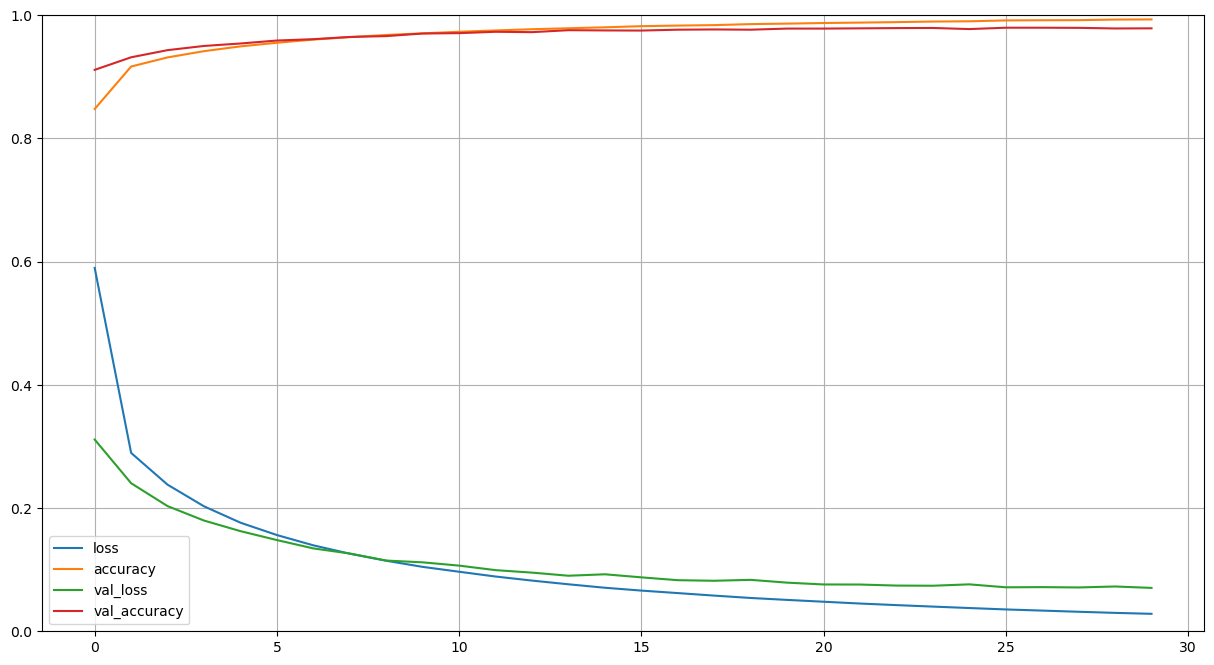

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 3s 10ms/step - loss: 0.0691 - accuracy: 0.9785


[0.0691167563199997, 0.9785000085830688]

In [25]:
model.predict(xtest) # gives a probablity of each number

313/313 [==============================] - 3s 11ms/step


array([[2.1107815e-06, 8.9430628e-08, 4.1715804e-05, ..., 9.9956948e-01,
        6.4995938e-06, 2.6668493e-05],
       [2.3570240e-07, 3.0872368e-05, 9.9993861e-01, ..., 6.4395733e-12,
        1.1854762e-06, 3.9499681e-13],
       [2.1512117e-06, 9.9720985e-01, 2.1027424e-04, ..., 1.0377206e-03,
        9.8103168e-04, 7.5740131e-06],
       ...,
       [8.2555577e-12, 3.4941069e-10, 3.5308198e-10, ..., 2.3667692e-06,
        3.4803722e-06, 6.0834209e-06],
       [3.0181749e-07, 2.8423570e-09, 1.5062771e-09, ..., 7.1067535e-10,
        5.9821283e-05, 5.7189392e-10],
       [9.8445426e-08, 7.4211431e-10, 1.2034350e-07, ..., 4.7437564e-13,
        1.0180773e-09, 4.7375703e-10]], dtype=float32)

In [26]:
yprob = model.predict(xtest)
yclasses = yprob.argmax(axis=-1)
yclasses

313/313 [==============================] - 3s 8ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [36]:
confusion_matrix = tf.math.confusion_matrix(ytest, yclasses)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    2,    0,    1,    4,    3,    1,    1,    1],
       [   0, 1122,    2,    1,    0,    0,    3,    2,    5,    0],
       [   2,    3, 1012,    1,    1,    0,    3,    8,    2,    0],
       [   0,    0,    5,  992,    0,    5,    0,    4,    2,    2],
       [   2,    0,    4,    1,  956,    0,    1,    3,    0,   15],
       [   2,    0,    0,    8,    1,  871,    5,    1,    3,    1],
       [   5,    3,    0,    1,    5,    5,  936,    0,    3,    0],
       [   1,    5,    6,    2,    0,    0,    0, 1005,    2,    7],
       [   5,    0,    3,    7,    4,    3,    5,    3,  942,    2],
       [   2,    3,    0,    6,    5,    0,    2,    7,    1,  983]],
      dtype=int32)>

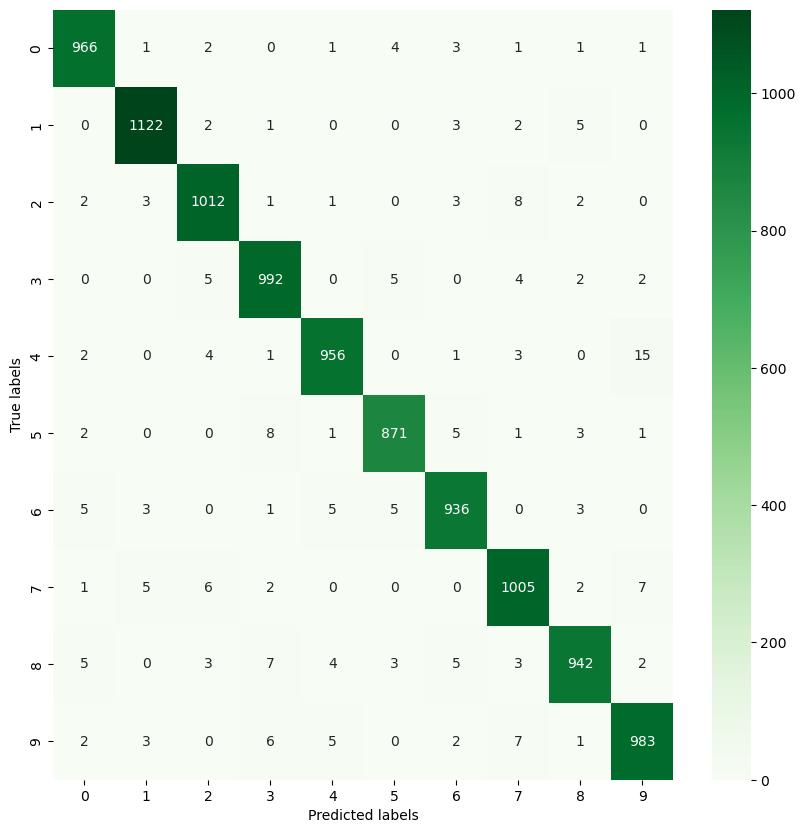

In [37]:
import seaborn as sb

fig = sb.heatmap(confusion_matrix,
                 annot=True,   # To annotate cells
                 fmt='g',      # Disable something :)
                 cmap='Greens')

fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)

plt.show()